In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('loan_train.csv')
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Debt_to_Income_Ratio
0,1,0,0,0,0,169.968275,0,1,2,1,8.092563,0.016862
1,1,1,1,0,0,169.968275,0,1,0,0,8.129112,0.016351
2,1,1,0,0,1,110.357703,0,1,2,1,7.489669,0.016929
3,1,1,0,1,0,163.303012,0,1,2,1,7.940400,0.018219
4,1,0,0,0,0,180.330340,0,1,2,1,8.115542,0.017784


In [3]:
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
# scaling the numerical columns
scaler = StandardScaler()
numerical_cols = ['LoanAmount', 'Total_Income', 'Debt_to_Income_Ratio']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [7]:
lr=LogisticRegression()

Accuracy: 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



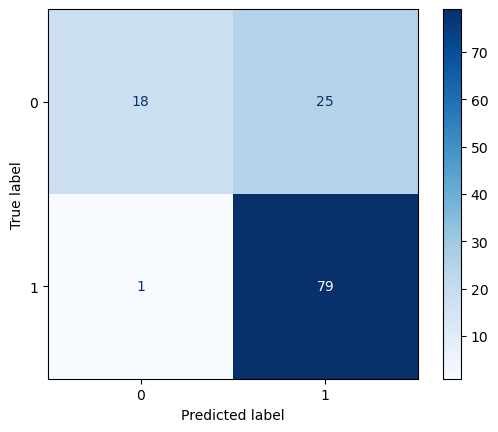

In [8]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap="Blues")

In [ ]:
from imblearn.over_sampling import SMOTE

# Define features (X) and target (y)
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Train-test split after resampling
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

print("Before SMOTE:", y.value_counts())
print("After SMOTE:", y_res.value_counts())

In [ ]:
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])